### Transformations data notebook. Objectives are:

* add strain names to the missing teams
* exclude outliers __done__
* calculate transformation efficiencies for each team __done__
* calculate efficiency for each strain and protocol (6 in total)
* do t-test to compare 2 protocols __done__

***
## Instructions

Calculate the transformation efficiencies for each team's preparation.
Calculate the transformation efficiencies for each strain/protocol category. There should be 6 in total:

DH5 Alpha / FB

Mach1 T1R / FB

TOP10F' / FB

DH5 Alpha / P25

Mach1 T1R / P25

TOP10F' / P25

Make sure you __exclude outliers__ from your calculations, based on your colleagues' comments. This should be colony forming units per µg pUC19 DNA per aliquot (cfu/µg). For commercial cells this figure is usually larger than 10E6 (10E9 for 'ultra' competent cells).
* Do the paired high and low plates agree with each other?
Do the 10 and 100 ng transformation results lead to similar transformation efficiencies?
You can then try to answer several questions through statistics (__t-tests__, and ANOVAs where you are comparing more than 2 datasets):
* Is one protocol better than the other?
* Is one strain better than the others?


In the tutorial you will discuss your analysis and results with your tutor.

In [1]:
import matplotlib.pyplot as plt
import csv
from pprint import pprint
import numpy as np
import traceback
import scipy.stats as stats
%matplotlib inline


#### Turns a crappy spreadheet into a good one

In [2]:
initial_data_location = '/home/ilya/Documents/uni_year3/BIOC3301/trasnformations/initial_data.csv' #location of initial speadsheet
parsed_data_location = '/home/ilya/Documents/uni_year3/BIOC3301/trasnformations/parsed_data.csv' # location of the new, better spreadsheet


csvfile = open(initial_data_location, 'r')
data = csv.reader(csvfile, delimiter=',')
new_csv = open(parsed_data_location, 'w')
def hasNumbers(inputString):
    return any(not char.isdigit() for char in inputString)
count = 0
for row in data:
    if count == 0:
        for cell in row:
            new_csv.write(cell + ";")
        new_csv.write("\n")
    count += 1
    try:
        if "exclude" in row or "Exclude" in row:
            print("Row " + str(count) + " was excluded")
            continue
        elif row[4] == "0" or not row[7]:
            print("Row " + str(count) + " is a control")
            continue
        elif hasNumbers(row[7]):
            print("Row " + str(count) + " has not numbers in row 8")
            continue
        elif row[0] == "example":
            print("Example row " + str(count))
            continue
        else:
            for item in row:
                new_csv.write(item + ";")
            new_csv.write("\n")
    except:
        print("ENCOUNTERED A MISTAKE in row " + str(count))
        print(row)
        pass
csvfile.close()
new_csv.close()

Row 1 has not numbers in row 8
Row 2 was excluded
Example row 3
Row 12 is a control
Row 13 is a control
Row 22 is a control
Row 23 is a control
Row 32 is a control
Row 33 is a control
Row 42 is a control
Row 43 is a control
Row 52 is a control
Row 53 is a control
Row 62 is a control
Row 63 is a control
Row 72 is a control
Row 73 is a control
Row 82 is a control
Row 83 is a control
Row 92 is a control
Row 93 is a control
Row 102 is a control
Row 103 is a control
Row 112 is a control
Row 113 is a control
Row 122 is a control
Row 123 is a control
Row 132 is a control
Row 133 is a control
Row 142 is a control
Row 143 is a control
Row 147 was excluded
Row 150 was excluded
Row 151 was excluded
Row 152 is a control
Row 153 is a control
Row 158 was excluded
Row 159 was excluded
Row 162 is a control
Row 163 is a control
Row 170 has not numbers in row 8
Row 171 has not numbers in row 8
Row 172 is a control
Row 173 is a control
Row 177 is a control
Row 181 has not numbers in row 8
Row 182 is a co

#### Next cell compiles all data in one big dictionary where every plate looks like this:
4: {'DNA': 100.0,

     'TE': 6222.222222222222,
     
     'dilution': 0.9,
     
     'method': 'FB',
     
     'team': '1',
     
     'transforms': 560.0}

In [3]:
def get_TE(transformations, DNA, dilutions): #function that calculates TE, has 3 inputs
    return transformations/((DNA/1000)*dilutions)
all_data = {}
count = 0
with open(parsed_data_location,'r') as csvfile:
    data = csv.reader(csvfile, delimiter=';')
    for row in data:
        count += 1
        if count == 1:
            continue
        all_data[count] = {}
        all_data[count]["team"] = row[0]
        all_data[count]["method"] = row[3]
        all_data[count]["DNA"] = float(row[4])
        all_data[count]["dilution"] = float(row[5])
        all_data[count]["transforms"] = float(row[7])
        all_data[count]["TE"] = get_TE(float(row[7]), float(row[4]), float(row[5]))
pprint(all_data)

{2: {'DNA': 100.0,
     'TE': 3911.111111111111,
     'dilution': 0.9,
     'method': 'FB',
     'team': '1',
     'transforms': 352.0},
 3: {'DNA': 100.0,
     'TE': 8199.999999999998,
     'dilution': 0.1,
     'method': 'FB',
     'team': '1',
     'transforms': 82.0},
 4: {'DNA': 100.0,
     'TE': 6222.222222222222,
     'dilution': 0.9,
     'method': 'FB',
     'team': '1',
     'transforms': 560.0},
 5: {'DNA': 100.0,
     'TE': 11799.999999999998,
     'dilution': 0.1,
     'method': 'FB',
     'team': '1',
     'transforms': 118.0},
 6: {'DNA': 10.0,
     'TE': 4777.777777777777,
     'dilution': 0.9,
     'method': 'FB',
     'team': '1',
     'transforms': 43.0},
 7: {'DNA': 10.0,
     'TE': 9000.0,
     'dilution': 0.1,
     'method': 'FB',
     'team': '1',
     'transforms': 9.0},
 8: {'DNA': 10.0,
     'TE': 888.8888888888888,
     'dilution': 0.9,
     'method': 'FB',
     'team': '1',
     'transforms': 8.0},
 9: {'DNA': 10.0,
     'TE': 1000.0,
     'dilution': 0.1,
 

       'transforms': 1056.0},
 212: {'DNA': 100.0,
       'TE': 0.0,
       'dilution': 0.1,
       'method': 'FB',
       'team': '10',
       'transforms': 0.0},
 213: {'DNA': 10.0,
       'TE': 33777.777777777774,
       'dilution': 0.9,
       'method': 'FB',
       'team': '10',
       'transforms': 304.0},
 214: {'DNA': 10.0,
       'TE': 53000.0,
       'dilution': 0.1,
       'method': 'FB',
       'team': '10',
       'transforms': 53.0},
 215: {'DNA': 10.0,
       'TE': 56888.88888888888,
       'dilution': 0.9,
       'method': 'FB',
       'team': '10',
       'transforms': 512.0},
 216: {'DNA': 10.0,
       'TE': 88000.0,
       'dilution': 0.1,
       'method': 'FB',
       'team': '10',
       'transforms': 88.0},
 217: {'DNA': 100.0,
       'TE': 11.111111111111109,
       'dilution': 0.9,
       'method': 'FB',
       'team': '11',
       'transforms': 1.0},
 218: {'DNA': 100.0,
       'TE': 0.0,
       'dilution': 0.1,
       'method': 'FB',
       'team': '11',
     

 311: {'DNA': 100.0,
       'TE': 51999.99999999999,
       'dilution': 0.1,
       'method': 'FB',
       'team': '15',
       'transforms': 520.0},
 312: {'DNA': 100.0,
       'TE': 95688.88888888888,
       'dilution': 0.9,
       'method': 'FB',
       'team': '15',
       'transforms': 8612.0},
 313: {'DNA': 100.0,
       'TE': 39999.99999999999,
       'dilution': 0.1,
       'method': 'FB',
       'team': '15',
       'transforms': 400.0},
 314: {'DNA': 10.0,
       'TE': 65222.22222222221,
       'dilution': 0.9,
       'method': 'FB',
       'team': '15',
       'transforms': 587.0},
 315: {'DNA': 10.0,
       'TE': 470000.0,
       'dilution': 0.1,
       'method': 'FB',
       'team': '15',
       'transforms': 470.0},
 316: {'DNA': 10.0,
       'TE': 1111111.111111111,
       'dilution': 0.9,
       'method': 'FB',
       'team': '15',
       'transforms': 10000.0},
 317: {'DNA': 10.0,
       'TE': 1180000.0,
       'dilution': 0.1,
       'method': 'FB',
       'team': '15

       'method': 'P25',
       'team': '29',
       'transforms': 372.0},
 528: {'DNA': 100.0,
       'TE': 99.99999999999999,
       'dilution': 0.1,
       'method': 'P25',
       'team': '29',
       'transforms': 1.0},
 529: {'DNA': 100.0,
       'TE': 6844.444444444443,
       'dilution': 0.9,
       'method': 'P25',
       'team': '29',
       'transforms': 616.0},
 530: {'DNA': 100.0,
       'TE': 2299.9999999999995,
       'dilution': 0.1,
       'method': 'P25',
       'team': '29',
       'transforms': 23.0},
 531: {'DNA': 10.0,
       'TE': 27777.777777777774,
       'dilution': 0.9,
       'method': 'P25',
       'team': '29',
       'transforms': 250.0},
 532: {'DNA': 10.0,
       'TE': 26000.0,
       'dilution': 0.1,
       'method': 'P25',
       'team': '29',
       'transforms': 26.0},
 533: {'DNA': 10.0,
       'TE': 31111.111111111106,
       'dilution': 0.9,
       'method': 'P25',
       'team': '29',
       'transforms': 280.0},
 534: {'DNA': 10.0,
       'TE': 1

#### Create methods dictionary, with TE for each method

In [4]:
methods_TE = {"FB" : [],
             "P25" : []}
count = 0
for plate in all_data:
    if all_data[plate]["method"] == "P25":
        methods_TE["P25"].append(all_data[plate]["TE"])
    elif all_data[plate]["method"] == "FB":
        methods_TE["FB"].append(all_data[plate]["TE"])
    else:
        print("No method info")

No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method info
No method 

#### Create teams dictionary, with TE for each team


In [5]:
teams_TE = {}
for item in range(1, 30):
    teams_TE[item] = []

count = 0
for plate in all_data:
    teams_TE[int(all_data[plate]['team'])].append(all_data[plate]["TE"])
# pprint(teams_TE)

#### Create strains/methods dictionary

In [6]:
# strain_method_TE = {"DH5FB" : [],
#                    "MachFB" : [],
#                    "TOPFB" : [],
#                    "DH5P25" : [],
#                    "MachP25" : [],
#                    "TOPP25" : []}
# for plate in all_data:
    

#### Create dilutions dictionary

In [7]:
dilution_TE = {"0.9" : [],
                    "0.1" : []}
for plate in all_data:
    dilution_TE[str(all_data[plate]['dilution'])].append(all_data[plate]["TE"])

#### Create concentrations dictionary

In [8]:
concentrations_TE = {"100.0" : [],
                    "10.0" : []}
for plate in all_data:
    concentrations_TE[str(all_data[plate]['DNA'])].append(all_data[plate]["TE"])

## Results section
#### Methods:

FB method TE: 4.716e+04
P25 method TE: 1.335e+05
Ttest_indResult(statistic=-3.506163112723728, pvalue=0.00050893062355432405)


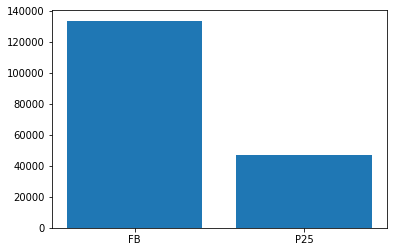

In [9]:
print("FB method TE: " + str('{:.3e}'.format(np.mean(methods_TE["FB"]))))
print("P25 method TE: " + str('{:.3e}'.format(np.mean(methods_TE["P25"]))))
print(stats.ttest_ind(np.asarray(methods_TE["FB"]), np.asarray(methods_TE["P25"])))

x = methods_TE.keys()
y = [np.mean(methods_TE["P25"]), np.mean(methods_TE["FB"])]
plt.bar(x, y)
plt.show()

*** 
#### DNA concentrations:

100 DNA TE: 2.073e+04
10 DNA TE: 1.271e+05
10 ng DNA / 100 ng DNA TE = 6.131
Ttest_indResult(statistic=-7.0043169414274216, pvalue=7.4415214040155709e-12)


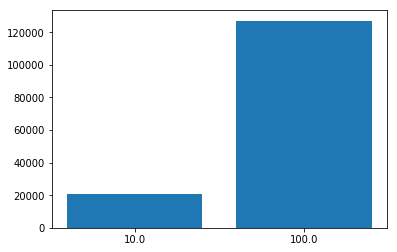

In [10]:
print("100 DNA TE: " + str('{:.3e}'.format(np.mean(concentrations_TE["100.0"]))))
print("10 DNA TE: " + str('{:.3e}'.format(np.mean(concentrations_TE["10.0"]))))
print("10 ng DNA / 100 ng DNA TE = " + str(round(np.mean(concentrations_TE["10.0"])/np.mean(concentrations_TE["100.0"]), 3)))
print(stats.ttest_ind(np.asarray(concentrations_TE["100.0"]), np.asarray(concentrations_TE["10.0"])))

x = concentrations_TE.keys()
y = [np.mean(concentrations_TE["100.0"]), np.mean(concentrations_TE["10.0"])]
plt.bar(x, y)
plt.show()

#### Dilution:

0.9 TE: 5.099e+04
0.1 TE: 9.683e+04
Ttest_indResult(statistic=-2.9122689736617118, pvalue=0.0037370779634829871)


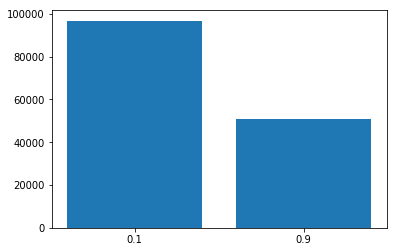

In [11]:
print("0.9 TE: " + str('{:.3e}'.format(np.mean(dilution_TE["0.9"]))))
print("0.1 TE: " + str('{:.3e}'.format(np.mean(dilution_TE["0.1"]))))
print(stats.ttest_ind(np.asarray(dilution_TE["0.9"]), np.asarray(dilution_TE["0.1"])))

x = dilution_TE.keys()
y = [np.mean(dilution_TE["0.1"]), np.mean(dilution_TE["0.9"])]
plt.bar(x, y)
plt.show()

*** 
#### Teams:

Transformation efficiency by team:

Team 1 : 4.210e+03
Team 2 : 2.398e+04
Team 3 : 7.583e+02
Team 4 : 2.086e+04
Team 5 : 7.193e+03
Team 6 : 1.413e+04
Team 7 : 3.762e+04
Team 8 : 6.152e+03
Team 9 : 2.181e+04
Team 10 : 6.612e+04
Team 11 : 9.731e+02
Team 12 : 1.496e+05
Team 13 : 4.050e+03
Team 14 : 7.476e+03
Team 15 : 2.638e+05
Team 16 : 1.372e+05
Team 17 : didn't give data
Team 18 : 9.043e+04
Team 19 : 1.711e+04
Team 20 : 7.356e+04
Team 21 : 1.259e+04
Team 22 : 1.010e+05
Team 23 : 2.058e+05
Team 24 : 1.507e+05
Team 25 : 3.220e+05
Team 26 : 5.515e+04
Team 27 : 3.056e+05
Team 28 : 4.699e+05
Team 29 : 1.528e+04


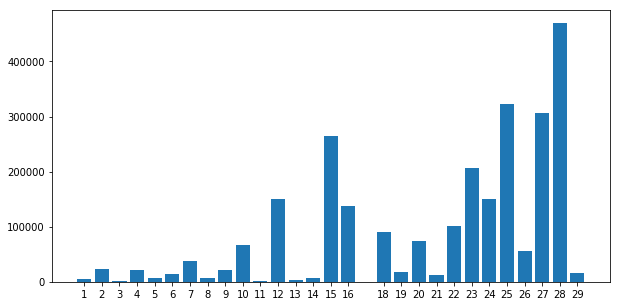

In [12]:
print("Transformation efficiency by team:\n")
for team in sorted(teams_TE):
    if teams_TE[team] == []:
        print("Team "  + str(team) + " : didn't give data")
        continue
    print("Team " + str(team) + " : " + str('{:.3e}'.format(np.mean(teams_TE[team]))))

x = []
y = []
for team in sorted(teams_TE):
    if teams_TE[team] == []:
        continue
    y.append(np.mean(teams_TE[team]))
    x.append(team)
plt.figure(figsize=(10, 5))  # width:20, height:3
plt.bar(x, y, align='center', width=0.8)
plt.xticks(x)
plt.show()
# pprint(x)
# pprint(y)